Setting up the functions to perform the training and data recording

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from time import time
import psutil
import warnings
import random
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

mushrooms = pd.read_csv('mushroom_final.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,2,1,2,1,1,2,1,...,1,1,1,1,1,1,1,2,2,2
2,1,2,1,3,1,3,1,1,2,2,...,1,1,1,1,1,1,1,2,2,3
3,0,1,2,3,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,4,0,4,1,2,2,1,...,1,1,1,1,1,1,2,2,3,2


In [2]:
features = mushrooms.drop('class',axis=1)
labels = mushrooms['class']

#split features and labels into train (80%) and test (20%) sets
#f for features
#l for labels
def split_features(features,labels):
    f_train, f_test, l_train, l_test = train_test_split(features,labels, test_size=0.2,random_state=42)
    #f_val, f_test, l_val, l_test = train_test_split(f_test,l_test, test_size=0.5,random_state=42)
    
    return f_train, f_test, l_train, l_test

In [3]:
def svm_trainer(features,labels,train_count):
    svc = SVC()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        svc.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return svc, f_test, l_test, train_times

#train_times = svm_trainer(features,labels,train_count=10)
#print("done!")

In [4]:
def knn_trainer(features,labels,train_count):
    knn = KNeighborsClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        knn.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return knn, f_test, l_test, train_times

#train_times = knn_trainer(features,labels,train_count=10)
#print("done!")

In [5]:
def logistic_regression_trainer(features,labels,train_count):
    lr = LogisticRegression()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        lr.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return lr, f_test, l_test, train_times

#train_times = logistic_regression_trainer(features,labels,train_count=10)
#print("done!")

In [6]:
def multilayer_perceptron_trainer(features,labels,train_count):
    MLP = MLPClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        MLP.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return MLP, f_test, l_test, train_times

#train_times = multilayer_perceptron_trainer(features,labels,train_count=10)
#print("done!")

In [7]:
def random_forest_trainer(features,labels,train_count):
    rf = RandomForestClassifier()
    train_times = []
    for ii in range(train_count):
        f_train,f_test,l_train,l_test = split_features(features,labels)
        t0 = time()
        rf.fit(f_train,l_train)
        t1 = time()
        train_times.append(t1-t0)
        
        #print update
        if ii % 5 == 0:
            print('round %d' % (ii))
            
    return rf, f_test, l_test, train_times

#train_times = random_forest_trainer(features,labels,train_count=10)
#print("done!")

In [8]:
nom_util = psutil.cpu_percent(interval=1)
KNN, knn_f_test, knn_l_test, knn_times = knn_trainer(features,labels,train_count=10)
knn_util = psutil.cpu_percent(interval=None)
LR, lr_f_test, lr_l_test, lr_times = logistic_regression_trainer(features,labels,train_count=10)
lr_util = psutil.cpu_percent(interval=None)
SVM, svm_f_test, svm_l_test, svm_times = svm_trainer(features,labels,train_count=10)
svm_util = psutil.cpu_percent(interval=None)
RF, rf_f_test, rf_l_test, rf_times = random_forest_trainer(features,labels,train_count=10)
rf_util = psutil.cpu_percent(interval=None)
MLP, mlp_f_test, mlp_l_test, mlp_times = multilayer_perceptron_trainer(features,labels,train_count=10)
mlp_util = psutil.cpu_percent(interval=None)
print('finished training!')

round 0
round 5
round 0
round 5
round 0
round 5
round 0
round 5
round 0
round 5
finished training!


In [9]:
cpu_array = [nom_util, knn_util, lr_util, svm_util, rf_util, mlp_util]
print(cpu_array)

[15.0, 26.7, 25.1, 15.8, 14.3, 99.9]


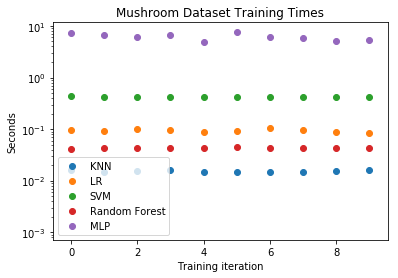

In [10]:
plt.scatter(range(len(knn_times)),knn_times,label="KNN")
plt.scatter(range(len(lr_times)),lr_times,label="LR")
plt.scatter(range(len(svm_times)),svm_times,label='SVM')
plt.scatter(range(len(rf_times)),rf_times,label='Random Forest')
plt.scatter(range(len(mlp_times)),mlp_times,label='MLP')
plt.title('Mushroom Dataset Training Times')
plt.yscale('log')
plt.xlabel('Training iteration')
plt.ylabel('Seconds')
plt.legend(loc='best')
plt.savefig('mushroom_training_times_log.png')
plt.show()

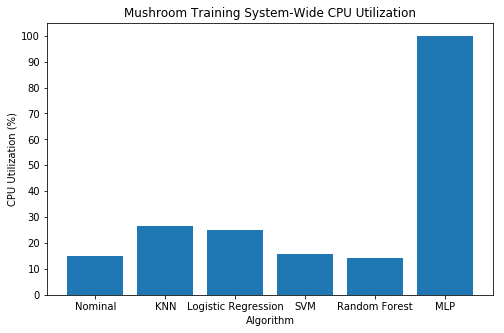

In [11]:
plt.figure(figsize=(8,5))
plt.bar(range(len(cpu_array)), cpu_array)
plt.title('Mushroom Training System-Wide CPU Utilization')
plt.xticks(range(len(cpu_array)), ['Nominal','KNN','Logistic Regression','SVM','Random Forest','MLP'])
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.ylabel('CPU Utilization (%)')
plt.xlabel('Algorithm')
plt.savefig('mushroom_training_cpu_utilization.png')
plt.show()

In [12]:
cpu_df = pd.DataFrame(cpu_array)
cpu_df.to_csv('mushroom_cpu.csv',index=False)

In [13]:
test_size = 500
knn_test_list = [knn_f_test.iloc[random.randint(0,len(knn_f_test))] for i in range(test_size)]
lr_test_list = [lr_f_test.iloc[random.randint(0,len(lr_f_test))] for i in range(test_size)]
svm_test_list = [svm_f_test.iloc[random.randint(0,len(svm_f_test))] for i in range(test_size)]
rf_test_list = [rf_f_test.iloc[random.randint(0,len(rf_f_test))] for i in range(test_size)]
mlp_test_list = [mlp_f_test.iloc[random.randint(0,len(mlp_f_test))] for i in range(test_size)]

In [14]:
t0 = time()
KNN.predict(knn_test_list)
t1 = time()
LR.predict(lr_test_list)
t2 = time()
SVM.predict(svm_test_list)
t3 = time()
RF.predict(rf_test_list)
t4 = time()
MLP.predict(mlp_test_list)
t5 = time()

pred_time_list = [t1-t0, t2-t1, t3-t2, t4-t3, t5-t4]

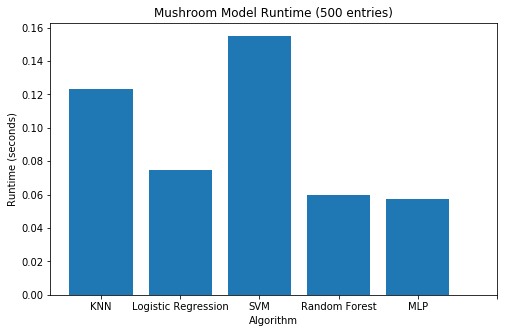

In [15]:
plt.figure(figsize=(8,5))
plt.bar(range(len(pred_time_list)), pred_time_list)
plt.title('Mushroom Model Runtime (%d entries)' % (test_size))
plt.xticks(range(len(cpu_array)), ['KNN','Logistic Regression','SVM','Random Forest','MLP'])
plt.ylabel('Runtime (seconds)')
plt.xlabel('Algorithm')
plt.savefig('mushroom_model_runtime.png')
plt.show()

In [16]:
runtime_df = pd.DataFrame(pred_time_list)
runtime_df.to_csv('mushroom_runtime.csv',index=False)